In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
df = pd.read_csv('Bacterial_strain_heatmap_tutorial_data.csv').set_index('Strain')

In [46]:
df.head()

,OqxA,OqxB,emrAB,nfsA,nfsB,MexAB-OprM,mdt Efflux pump genes,blaSHV-28,blaSHV-148,aac(3)-Iid,aac(3)-Iie,aac(6')-Ib-cr,strA,strB,blaCTX-M-14,blaCTX-M-15,blaLAP-2,blaOXA-1,blaTEM-1B,dfrA1,dfrA14,qnrB1,qnrS1,sul1,sul2,tet(A),clpK,traT,fecIRABCDE,acrAB,acrREF,mrkD,iutA,entABCDEFHS,treC,pgaABC,ureDABCEFG,Capsule K1,Capsule K2,Capsule K57
Strain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Strain 1,2,2,0,0,0,2,2,0,2,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,0,2,2,2,2,2,2,2,2,3,5,5
Strain 2,2,2,2,2,2,2,2,0,2,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,3,5,5
Strain 3,0,2,2,2,2,2,2,0,2,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,3,5,5
Strain 4,2,2,2,2,2,2,2,0,2,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,3,5,5
Strain 5,2,2,2,2,2,2,2,0,2,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,3,5,5


In [47]:
df.columns = [
       'OqxA', 'OqxB', 'emrAB', 'nfsA', 'nfsB', 'MexAB-OprM',
       'mdt Efflux pump genes', 'blaSHV-28', 'blaSHV-148', 'aac(3)-IId',
       'aac(3)-IIe', "aac(6')-Ib-cr", 'strA', 'strB', 'blaCTX-M-14',
       'blaCTX-M-15', 'blaLAP-2', 'blaOXA-1', 'blaTEM-1B', 'dfrA1', 'dfrA14',
       'qnrB1', 'qnrS1', 'sul1', 'sul2', 'tet(A)', 'clpK', 'traT',
       'fecIRABCDE', 'acrAB', 'acrREF', 'mrkD', 'iutA', 'entABCDEFHS', 'treC',
       'pgaABC', 'ureDABCEFG', 'Capsule K1', 'Capsule K2', 'Capsule K57'
]

In [34]:
amr_columns_to_extract = ['OqxA', 'OqxB', 'emrAB', 'nfsA', 'nfsB', 'MexAB-OprM',
       'mdt Efflux pump genes','blaSHV-28', 'blaSHV-148', 'aac(3)-IId', 'aac(3)-IIe',
       "aac(6')-Ib-cr", "strA", "strB", 'blaCTX-M-14',
       'blaCTX-M-15', 'blaLAP-2', 'blaOXA-1', 'blaTEM-1B', 'dfrA1', 'dfrA14',
       'qnrB1', 'qnrS1', 'sul1', 'sul2', 'tet(A)']

In [35]:
virulence_columns_to_extract = ['clpK', 'traT',
       'fecIRABCDE', 'acrAB', 'acrREF', 'mrkD', 'iutA', 'entABCDEFHS', 'treC',
       'pgaABC', 'ureDABCEFG']

In [36]:
capsule_type = ['Capsule K1', 'Capsule K2','Capsule K57']

### Unique reference colour for each category of gene

In [37]:
cmap_dict = {0: '#E9EEEC', 1: '#6B83A9',2: '#868B89'}
cmap = ListedColormap([cmap_dict[i] for i in range(0,3)])

cmap_dict_2 = {3: '#D43B34', 4: '#79D170',5: '#E9EEEC'}
cmap2 = ListedColormap([cmap_dict_2[i] for i in range(3,6)])

### Figure grid pattern organisation 

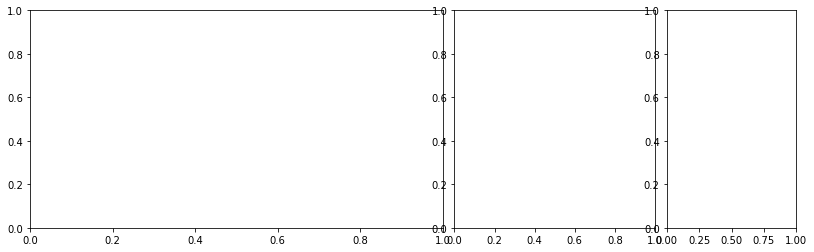

In [38]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)

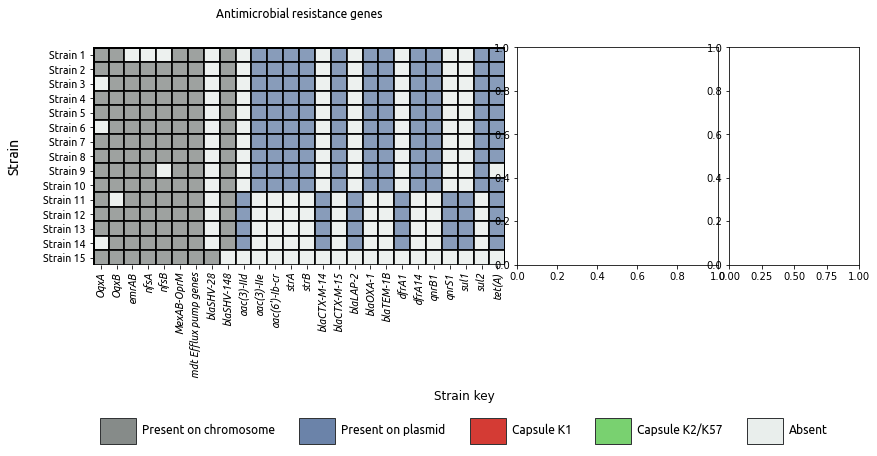

In [39]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)


ax1.set_title('Antimicrobial resistance genes',size=12, pad=30, fontname='Ubuntu')

ax1 = sns.heatmap(df[amr_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax1)

for tick in ax1.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax1.tick_params(axis='x', labelsize=10.5)


for tick in ax1.get_yticklabels():
    tick.set_fontname('Ubuntu')
ax1.tick_params(axis='y', labelsize=10.5)


ax1.set_ylabel("Strain\n", fontname='Ubuntu', fontsize=14)


legend_elements = [ Patch(facecolor='#868B89', edgecolor='#323436',
                         label='Present on chromosome'),
                   Patch(facecolor='#6B83A9', edgecolor='#323436',
                         label='Present on plasmid'),
                  Patch(facecolor='#D43B34', edgecolor='#323436',
                         label='Capsule K1'),
                  Patch(facecolor='#79D170', edgecolor='#323436',
                         label='Capsule K2/K57'),
                  Patch(facecolor='#E9EEEC', edgecolor='#323436',
                         label='Absent')]


ax1.legend(handles=legend_elements, 
          bbox_to_anchor=[0.9, -0.7], 
          title='Strain key', 
          ncol=5,
          frameon=False,
          prop={'size': 12, 'family': 'Ubuntu'},
          title_fontsize=12,
          handleheight=3, 
          handlelength=3,
          handletextpad=0.5,
          labelspacing=1.2,
          loc='center')

ax1.axhline(y=0, color='k',linewidth=3)
ax1.axhline(y=df[amr_columns_to_extract].shape[1], color='k',linewidth=3)
ax1.axvline(x=0, color='k',linewidth=3)
ax1.axvline(x=df[amr_columns_to_extract].shape[1], color='k',linewidth=3); 



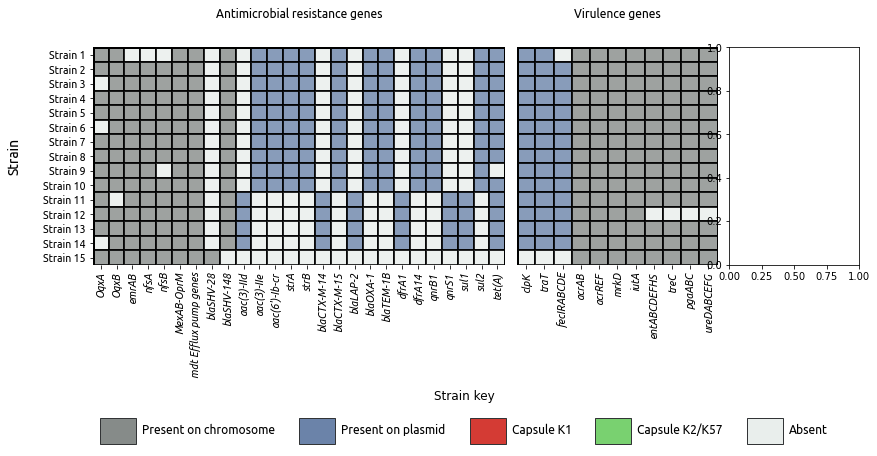

In [40]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)


ax1.set_title('Antimicrobial resistance genes',size=12, pad=30, fontname='Ubuntu')

ax1 = sns.heatmap(df[amr_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax1)

for tick in ax1.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax1.tick_params(axis='x', labelsize=10.5)


for tick in ax1.get_yticklabels():
    tick.set_fontname('Ubuntu')
ax1.tick_params(axis='y', labelsize=10.5)


ax1.set_ylabel("Strain\n", fontname='Ubuntu', fontsize=14)


legend_elements = [ Patch(facecolor='#868B89', edgecolor='#323436',
                         label='Present on chromosome'),
                   Patch(facecolor='#6B83A9', edgecolor='#323436',
                         label='Present on plasmid'),
                  Patch(facecolor='#D43B34', edgecolor='#323436',
                         label='Capsule K1'),
                  Patch(facecolor='#79D170', edgecolor='#323436',
                         label='Capsule K2/K57'),
                  Patch(facecolor='#E9EEEC', edgecolor='#323436',
                         label='Absent')]


ax1.legend(handles=legend_elements, 
          bbox_to_anchor=[0.9, -0.7], 
          title='Strain key', 
          ncol=5,
          frameon=False,
          prop={'size': 12, 'family': 'Ubuntu'},
          title_fontsize=12,
          handleheight=3, 
          handlelength=3,
          handletextpad=0.5,
          labelspacing=1.2,
          loc='center')

ax1.axhline(y=0, color='k',linewidth=3)
ax1.axhline(y=df[amr_columns_to_extract].shape[1], color='k',linewidth=3)
ax1.axvline(x=0, color='k',linewidth=3)
ax1.axvline(x=df[amr_columns_to_extract].shape[1], color='k',linewidth=3);
#####################################################################################


ax2 = sns.heatmap(df[virulence_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax2)

ax2.set_title('Virulence genes',size=12, pad=30, fontname='Ubuntu')

for tick in ax2.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax2.tick_params(axis='x', labelsize=10.5)

for tick in ax2.get_yticklabels():
    tick.set_visible(False)
    
ax2.tick_params(left=False)
ax2.set_ylabel('')    
    
ax2.axhline(y=0, color='k',linewidth=3)

ax2.axvline(x=0, color='k',linewidth=3)
ax2.axvline(x=df[virulence_columns_to_extract].shape[1], color='k',linewidth=3); 
 


# #############################################################################################

# ax3 = sns.heatmap(df[capsule_type], cmap=cmap2, cbar=False,linewidths=0.4, 
#                   linecolor='black', alpha=0.8, ax=ax3)

# ax3.set_title('Capsule type',size=12, pad=30, fontname='Ubuntu')

# for tick in ax3.get_xticklabels():
#     tick.set_fontname('Ubuntu')
#     tick.set_style('italic')
# ax3.tick_params(axis='x', labelsize=10.5)

# for tick in ax3.get_yticklabels():
#     tick.set_visible(False)
    
# ax3.tick_params(left=False)
# ax3.set_ylabel('')

# ax3.axhline(y=0, color='k',linewidth=3)
# # ax2.axhline(y=df[virulence_columns_to_extract].shape[1], color='k',linewidth=5)
# ax3.axvline(x=0, color='k',linewidth=3)
# ax3.axvline(x=df[capsule_type].shape[1], color='k',linewidth=3); 


# plt.savefig("Example_tutorial_heatmap.jpeg", bbox_inches='tight', dpi=350); 



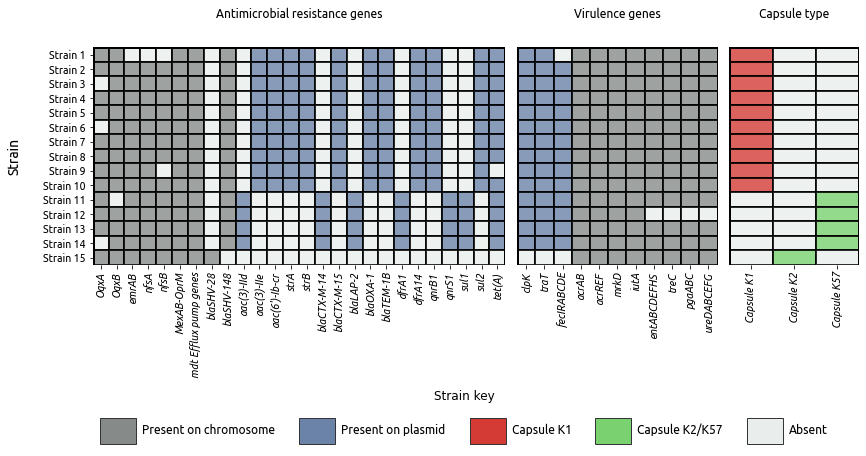

In [51]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)


ax1.set_title('Antimicrobial resistance genes',size=12, pad=30, fontname='Ubuntu')

ax1 = sns.heatmap(df[amr_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax1)

for tick in ax1.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax1.tick_params(axis='x', labelsize=10.5)


for tick in ax1.get_yticklabels():
    tick.set_fontname('Ubuntu')
ax1.tick_params(axis='y', labelsize=10.5)


ax1.set_ylabel("Strain\n", fontname='Ubuntu', fontsize=14)


legend_elements = [ Patch(facecolor='#868B89', edgecolor='#323436',
                         label='Present on chromosome'),
                   Patch(facecolor='#6B83A9', edgecolor='#323436',
                         label='Present on plasmid'),
                  Patch(facecolor='#D43B34', edgecolor='#323436',
                         label='Capsule K1'),
                  Patch(facecolor='#79D170', edgecolor='#323436',
                         label='Capsule K2/K57'),
                  Patch(facecolor='#E9EEEC', edgecolor='#323436',
                         label='Absent')]


ax1.legend(handles=legend_elements, 
          bbox_to_anchor=[0.9, -0.7], 
          title='Strain key', 
          ncol=5,
          frameon=False,
          prop={'size': 12, 'family': 'Ubuntu'},
          title_fontsize=12,
          handleheight=3, 
          handlelength=3,
          handletextpad=0.5,
          labelspacing=1.2,
          loc='center')

ax1.axhline(y=0, color='k',linewidth=3)
ax1.axhline(y=df[amr_columns_to_extract].shape[1], color='k',linewidth=3)
ax1.axvline(x=0, color='k',linewidth=3)
ax1.axvline(x=df[amr_columns_to_extract].shape[1], color='k',linewidth=3);
#####################################################################################


ax2 = sns.heatmap(df[virulence_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax2)

ax2.set_title('Virulence genes',size=12, pad=30, fontname='Ubuntu')

for tick in ax2.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax2.tick_params(axis='x', labelsize=10.5)

for tick in ax2.get_yticklabels():
    tick.set_visible(False)
    
ax2.tick_params(left=False)
ax2.set_ylabel('')    
    
ax2.axhline(y=0, color='k',linewidth=3)
# ax2.axhline(y=df[virulence_columns_to_extract].shape[1], color='k',linewidth=5)
ax2.axvline(x=0, color='k',linewidth=3)
ax2.axvline(x=df[virulence_columns_to_extract].shape[1], color='k',linewidth=3); 
 


# #############################################################################################

ax3 = sns.heatmap(df[capsule_type], cmap=cmap2, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax3)

ax3.set_title('Capsule type',size=12, pad=30, fontname='Ubuntu')

for tick in ax3.get_xticklabels():
    tick.set_fontname('Ubuntu')
    tick.set_style('italic')
ax3.tick_params(axis='x', labelsize=10.5)

for tick in ax3.get_yticklabels():
    tick.set_visible(False)
    
ax3.tick_params(left=False)
ax3.set_ylabel('')


ax3.axhline(y=0, color='k',linewidth=3)
ax3.axvline(x=0, color='k',linewidth=3)
ax3.axvline(x=df[capsule_type].shape[1], color='k',linewidth=3); 


plt.savefig("Example_tutorial_heatmap.jpeg", bbox_inches='tight', dpi=350); 

